# Import libraries

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Import Data

In [100]:
path=r'/Users/yasersouri/Desktop/data analysis/immersion 6/World University Rankings - 2021'

In [101]:
df = pd.read_csv(os.path.join(path, 'clean_df.csv'),index_col=False)

In [102]:
df.head()

,Unnamed: 0,ranking,title,location,number_of_students,international_students%,overall_score,teaching_score,research_score,citations_score,industry_income_score,international_outlook_score
0,0,1,University of Oxford,United Kingdom,20774,0.41,95.6,91.3,99.6,98.0,68.7,96.4
1,1,2,Stanford University,United States of America,16223,0.23,94.9,92.2,96.7,99.9,90.1,79.5
2,2,3,Harvard University,United States of America,21261,0.25,94.8,94.4,98.8,99.4,46.8,77.7
3,3,4,California Institute of Technology,United States of America,2238,0.33,94.5,92.5,96.9,97.0,92.7,83.6
4,4,5,Massachusetts Institute of Technology,United States of America,11276,0.34,94.4,90.7,94.4,99.7,90.4,90.0


## Data prep for regression analysis

####  hypotheses
 A higher international_outlook_score is associated with a higher overall_score.
 

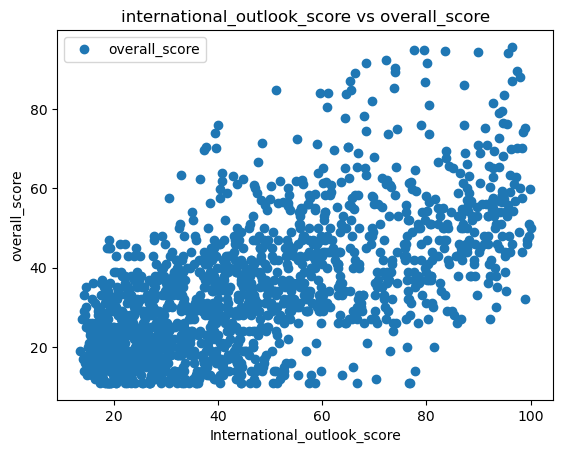

In [105]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(y = 'overall_score', x='international_outlook_score',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('international_outlook_score vs overall_score')  
plt.ylabel('overall_score')  
plt.xlabel('International_outlook_score')  
plt.show()

In [106]:
# Reshape the variables into NumPy arrays and put them into separate objects.

y = df['overall_score'].values.reshape(-1,1)
X = df['international_outlook_score'].values.reshape(-1,1)

In [107]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Regression analysis 1st hypothesis

In [109]:
# Create a regression object.

regression = LinearRegression()

In [110]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [111]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

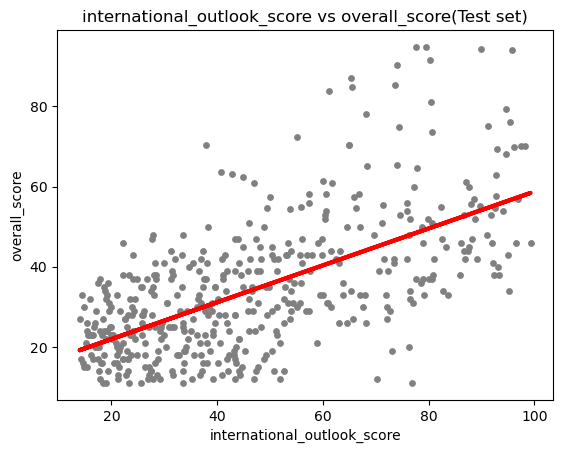

In [112]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('international_outlook_score vs overall_score(Test set)')
plot_test.xlabel('international_outlook_score')
plot_test.ylabel('overall_score')
plot_test.show()

international_outlook_score has a moderate positive correlation (~0.63) with overall_score.

Explanation: This suggests that universities with strong internationalization (more international students, faculty, and collaborations) tend to rank higher.



In [114]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [115]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.46039586]]
Mean squared error:  176.54605667730087
R2 score:  0.3903454974780718


In [116]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,17.0,19.232939
1,38.0,27.289867
2,90.3,46.764612
3,44.0,37.556694
4,43.0,28.072540
5,24.0,19.785414
6,33.0,42.114613
7,57.4,42.989366
8,38.0,23.422542
9,19.0,32.538380


#### Observations:  
  - Some predictions are relatively close to the actual values (e.g., index 0: Actual = 17.0, Predicted = 19.23).  
  - Other predictions show significant discrepancies (e.g., index 2: Actual = 90.3, Predicted = 46.76 and index 19: Actual = 70.3, Predicted = 30.10).  
  - The model seems to **underestimate higher actual values** and **overestimate lower actual values**, suggesting potential issues with variance or bias.

#### Reflections on Data Bias  
Bias in the dataset could contribute to the observed errors. Some possible sources of bias include:  

1. **Sampling Bias:** If the training data does not represent all cases well, the model may struggle with certain ranges of values (e.g., higher values being underestimated).  
2. **Feature Selection Bias:** If key predictive features were omitted or poorly represented, the model may lack the ability to make accurate predictions.  
3. **Measurement Bias:** If the way data was collected introduced errors, this could impact predictions

## Data prep for regression analysis 2nd hypothesis

####  hypotheses
 
 Universities with higher research_score tend to have higher teaching_score.

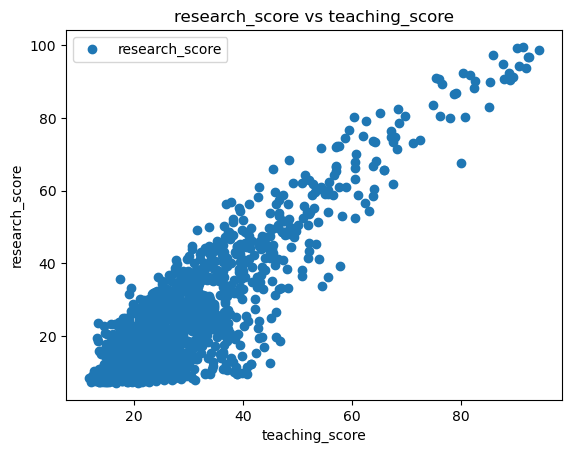

In [122]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(y = 'research_score', x='teaching_score',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('research_score vs teaching_score')  
plt.ylabel('research_score')  
plt.xlabel('teaching_score')  
plt.show()

In [123]:
# Reshape the variables into NumPy arrays and put them into separate objects.

y2= df['research_score'].values.reshape(-1,1)
X2 = df['teaching_score'].values.reshape(-1,1)

In [124]:
# Split data into a training set and a test set.

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=0)

## Regression analysis 2nd hypothesis

In [126]:
# Create a regression object.

regression2 = LinearRegression()

In [127]:
# Fit the regression object onto the training set.

regression2.fit(X2_train, y2_train)

LinearRegression()

In [128]:
# Predict the values of y using X.

y2_predicted = regression2.predict(X2_test)

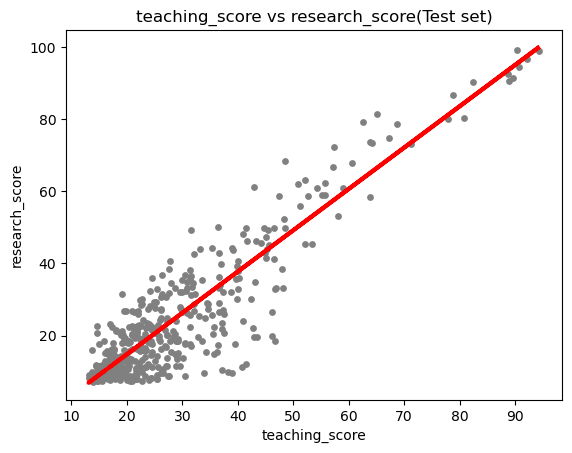

In [129]:
# Create a plot that shows the regression line from the model on the test set.

plot_test2 = plt
plot_test2.scatter(X2_test, y2_test, color='gray', s = 15)
plot_test2.plot(X2_test, y2_predicted, color='red', linewidth =3)
plot_test2.title('teaching_score vs research_score(Test set)')
plot_test2.xlabel('teaching_score')
plot_test2.ylabel('research_score')
plot_test2.show()

Teaching Score & Research Score (0.89): Institutions with strong research also tend to have strong teaching.

In [131]:
# Create objects that contain the model summary statistics.

rmse2 = mean_squared_error(y2_test, y2_predicted) # This is the mean squared error
r22 = r2_score(y2_test, y2_predicted) # This is the R2 score.

In [132]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression2.coef_)
print('Mean squared error: ', rmse2)
print('R2 score: ', r22)

Slope: [[1.14522665]]
Mean squared error:  62.91964270822248
R2 score:  0.807893925137017


In [133]:
# Create a dataframe comparing the actual and predicted values of y.

data2 = pd.DataFrame({'Actual': y2_test.flatten(), 'Predicted': y2_predicted.flatten()})
data2.head(30)

,Actual,Predicted
0,8.9,11.631013
1,34.6,28.580367
2,90.5,93.743764
3,30.8,22.854234
4,16.0,18.845941
5,11.7,25.030165
6,21.6,19.991168
7,39.9,34.191978
8,21.5,16.440965
9,8.1,8.882469


Overall, the model appears to be performing well, showing a significant improvement in prediction accuracy and explaining a larger portion of the variance.